# Лабораторна робота №6
## ФБ-21 Хав'юк Андрій
## Застосування Numpy

**Мета роботи**: отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та градієнтного спуску.

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.plotting.register_matplotlib_converters()

print("Setup has been successfully complete !")

Setup has been successfully complete !


#### Завдання №1

1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу
результатів.

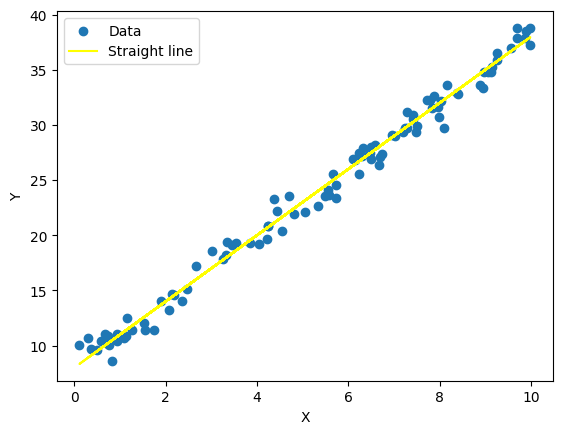

In [7]:
# generate random data with normal distribution around of straight line
points = 100
k, b = 3, 8
x = np.random.rand(points) * 10
y = k*x + b + np.random.randn(points)

# plot part
plt.scatter(x, y, label="Data")
plt.plot(x, k*x+b, color="yellow", label="Straight line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок kk� та bb�.

In [10]:
def squaredLeast(x, y):
    xMean = np.mean(x)
    yMean = np.mean(y)
    xyMean = np.mean(x * y)
    xSquaredMean = np.mean(x ** 2)
    kHat = (xyMean - xMean * yMean) / (xSquaredMean - xMean ** 2)
    bHat = yMean - kHat * xMean
    return kHat, bHat

kHat, bHat = squaredLeast(x, y)
print(f"Evaluation k(^) : {kHat}")
print(f"Evaluation b(^) : {bHat}")

Estimation k(^) : 2.9839695753658946
Estimation b(^) : 8.06836581617824


3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

In [13]:
# Evaluation of straight line parameters by np.polyfit
kPfit, bPfit = np.polyfit(x, y, 1)

print("Parameter evaluations by method of least squares")
print(f"k(^)={kHat}, b(^)={bHat}\n")
print("Parameter evaluations by np.polyfit")
print(f"k={kPfit}, b={bPfit}\n")
print("Initial straight line params")
print(f"k={k}, b={b}\n")

Parameter evaluations by method of least squares
k(^)=2.9839695753658946, b(^)=8.06836581617824

Parameter evaluations by np.polyfit
k=2.9839695753658955, b=8.068365816178225

Initial straight line params
k=3, b=8



4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

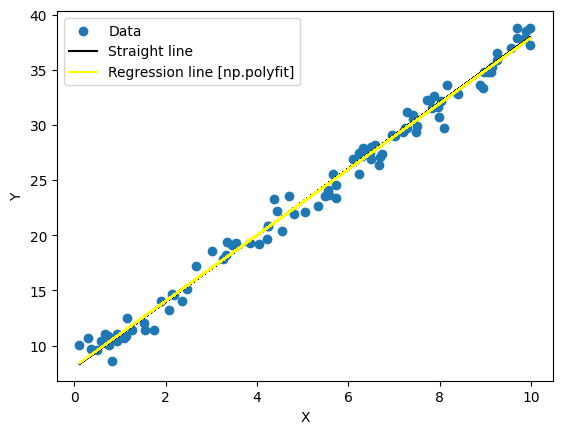

In [15]:
plt.scatter(x, y, label="Data")
plt.plot(x, k*x+b, color="black", label="Straight line")
plt.plot(x, kPfit*x + bPfit, color='yellow', label="Regression line [np.polyfit]")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

#### Завдання №2

1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок kk� та bb�. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [16]:
def gradientDrop(x, y, learning_rate=0.01, n_iter=1000):
    k = 0
    b = 0
    for i in range(0, n_iter):
        yPred = k*x+b
        # partial derivatives calculations
        dk = np.sum(2*(yPred-y)*x) / x.size
        db = np.sum(2*(yPred-y)) / x.size
        # updating k and b values
        k -= learning_rate*dk
        b -= learning_rate*db
    return k, b

learning_rate = 0.01
n_iter = 1000
kGD, bGD = gradientDrop(x, y, learning_rate, n_iter)
print(f"Parameters evaluation by the method of gradient drop:\nk={kGD}\nb={bGD}")

Parameters evaluation by the method of gradient drop:
k=2.9932880144785665
b=8.003998868844805


2. Додайте отриману лінію регресії на загальний графік

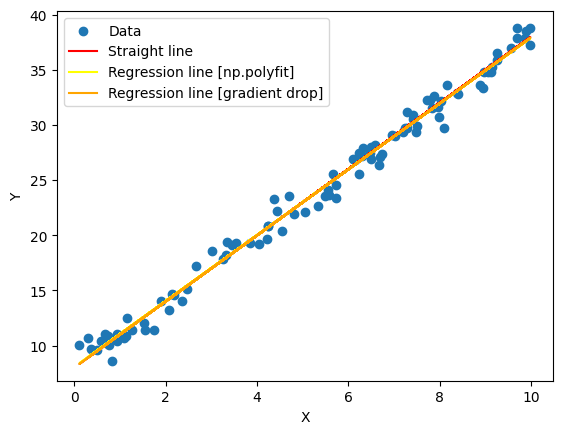

In [19]:
plt.scatter(x, y, label="Data")
plt.plot(x, k*x+b, color="red", label="Straight line")
plt.plot(x, kPfit*x + bPfit, color="yellow", label="Regression line [np.polyfit]")
plt.plot(x, kGD*x+bGD, color="orange", label="Regression line [gradient drop]")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

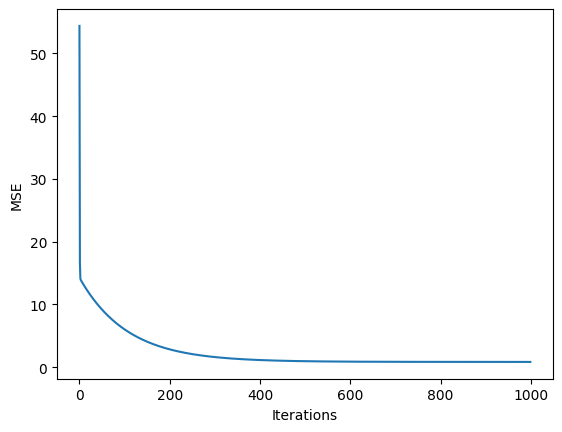

In [21]:
def mseEvaluate(k, b, x, y):
    yPred = k*x+b
    mse = np.mean((y-yPred)**2)
    return mse

msePrevious = []
for i in range(n_iter):
    kGD, bGD = gradientDrop(x, y, learning_rate, i+1)
    mse = mseEvaluate(kGD, bGD, x, y)
    msePrevious.append(mse)

plt.plot(range(n_iter), msePrevious)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

4. Порівняйте отримані результати з результатами попереднього завдання

In [22]:
print("Comparing evaluations of parameters\n")
print(f"\tnp.polyfit: k={kPfit}, b={bPfit}\n")
print(f"\tGradient drop: k={kGD}, b={bGD}\n")
print(f"\tLeast squares: k={kHat}, b={bHat}")

Comparing evaluations of parameters

	np.polyfit: k=2.9839695753658955, b=8.068365816178225

	Gradient drop: k=2.9932880144785665, b=8.003998868844805

	Least squares: k=2.9839695753658946, b=8.06836581617824
